In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
# Load the data
df_salary = pd.read_csv("./datasets/salary_dataset.csv")

In [200]:
# Inspect the structure of the data
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [201]:
# Copy DF for DF EDA
df_salary_eda = df_salary.copy()

In [202]:
# Copy DF for DF Bucketing
df_salary_bucketing = df_salary.copy()

### EDA

In [203]:
# Visualize the data
df_salary_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [204]:
# Detect missing values
df_salary_eda.isnull().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [205]:
# Statistical summary of the data
df_salary_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

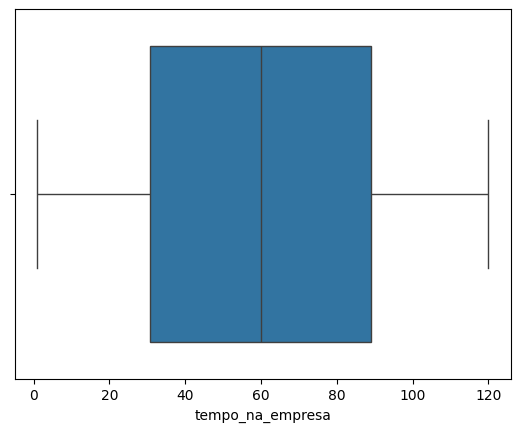

In [206]:
# Verify / detect outliers
sns.boxplot(data=df_salary_eda, x="tempo_na_empresa")

<Axes: xlabel='nivel_na_empresa'>

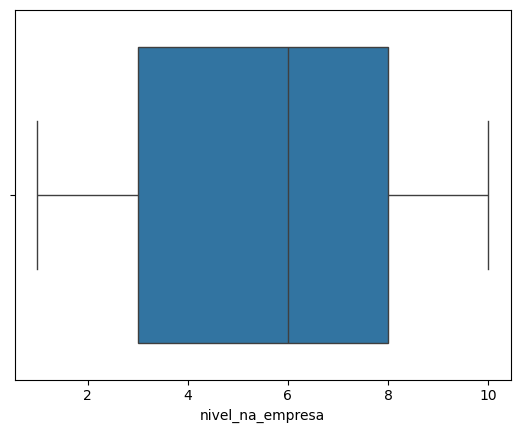

In [207]:
sns.boxplot(data=df_salary_eda, x="nivel_na_empresa")

<Axes: xlabel='salario_em_reais'>

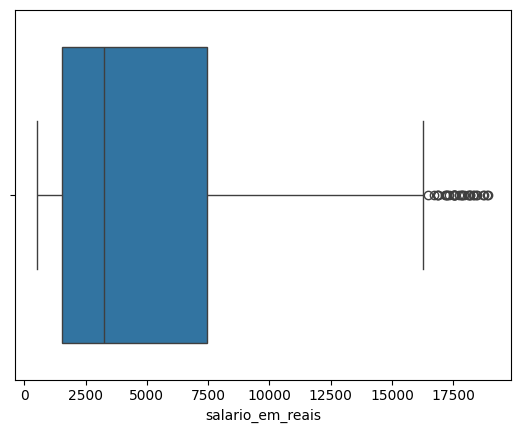

In [208]:
sns.boxplot(data=df_salary_eda, x="salario_em_reais")

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

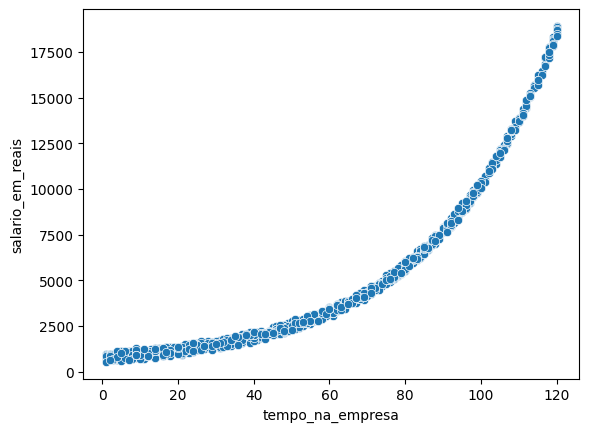

In [209]:
# Crossover numerical variables of real salary (dependent variable)
sns.scatterplot(data=df_salary_eda, x="tempo_na_empresa", y="salario_em_reais")

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

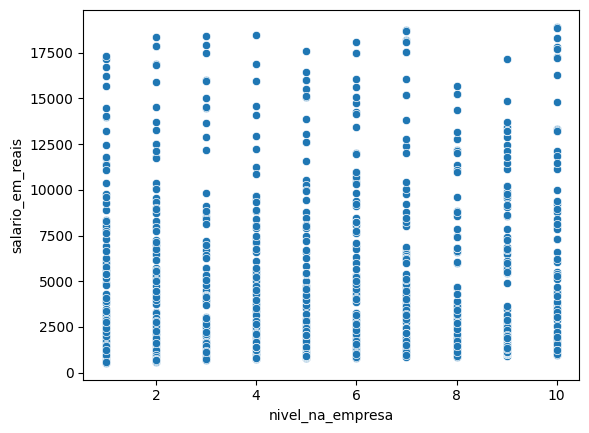

In [210]:
sns.scatterplot(data=df_salary_eda, x="nivel_na_empresa", y="salario_em_reais")

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

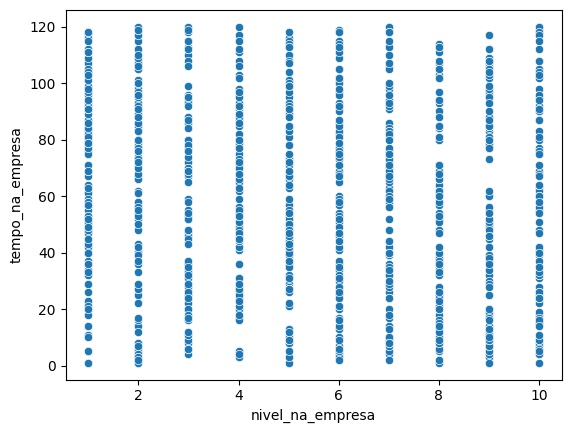

In [211]:
sns.scatterplot(data=df_salary_eda, x="nivel_na_empresa", y="tempo_na_empresa")

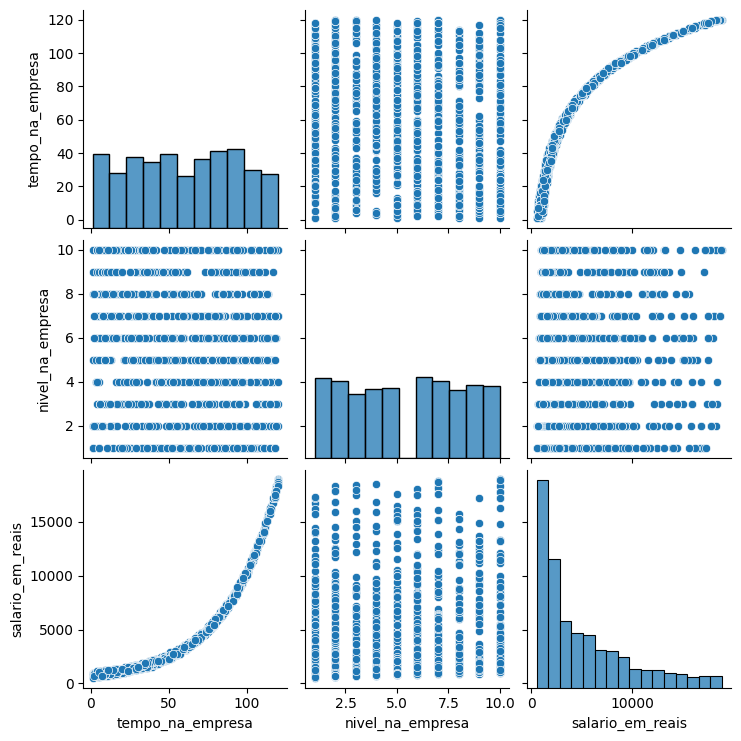

In [212]:
# Hystogram of variables
sns.pairplot(data=df_salary_eda)

<Axes: >

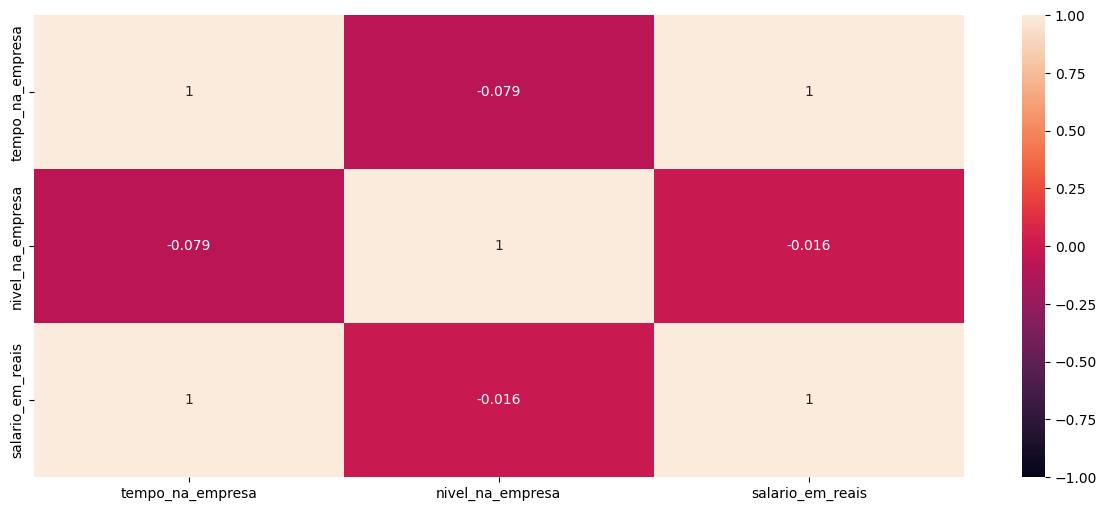

In [213]:
# Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df_salary_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

<Axes: >

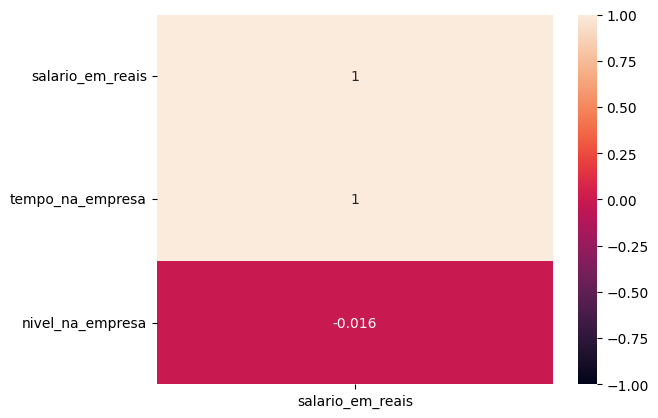

In [214]:
# Ranking of variables
sns.heatmap(df_salary_eda.corr('spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False), vmin=-1, vmax=1, annot=True)

In [215]:
# Bucketing time in company
bins_time_in_company = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_time_in_company = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']

df_salary_bucketing['escala_tempo'] = pd.cut(df_salary_bucketing['tempo_na_empresa'], bins=bins_time_in_company, labels=labels_time_in_company, include_lowest=True)

In [216]:
df_salary_bucketing.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

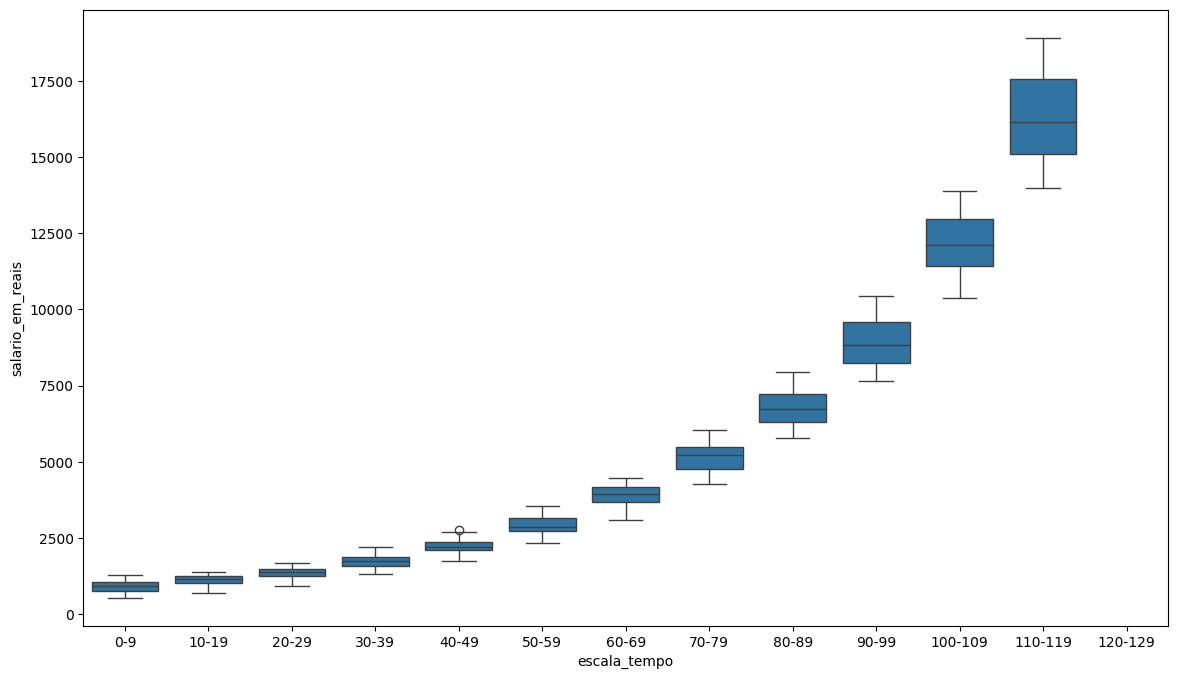

In [217]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_salary_bucketing, x="escala_tempo", y="salario_em_reais")

### Treaning Linear Regression Model

In [218]:
# Import libs
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np

In [219]:
# Create training and test datasets
X = df_salary.drop(['salario_em_reais'], axis=1)
y = df_salary['salario_em_reais']


In [220]:
# Split the data into training and test sets using 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [221]:
kf

KFold(n_splits=5, random_state=51, shuffle=True)

In [222]:
# Block for model training

# Create a pipeline
# 1. Standardize the data (tempo_na_empresa and nivel_na_empresa)

# Names of the columns to be standardized
columns_to_standardize = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer to numeric variables
transformer_numeric = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, columns_to_standardize)
    ]
)

# Create a principal pipeline
model_regresion = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Storage RMSE
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Storage R2
r2score_fold_test = []

# Storage residuals
residuals = []

# Storage predictions
y_pred_total = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_regresion.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model_regresion.predict(X_train)
    y_test_pred = model_regresion.predict(X_test)
    
    # Calculate RMSE
    rmse_train = np.sqrt(np.mean((y_train - y_train_pred)**2))
    rmse_test = np.sqrt(np.mean((y_test - y_test_pred)**2))
    r2_score_test = r2_score(y_test, y_test_pred)
    residuals_test = np.array(y_test - y_test_pred)
    
    # Append to storage
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2_score_test)
    residuals.append(residuals_test)
    y_pred_total.append(y_test_pred)

# Print RMSE
rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)

percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100 
residuals = np.array(residuals).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)
    

### Metrics Analysis - Linear Regression

In [223]:
# Metrics
print(f'RMSE Train: {rmse_train_final}')
print(f'RMSE Test: {rmse_test_final}')
print(f'%: {percentual_rmse_final}')
print(f'R2 Score: {r2score_test_final}')

RMSE Train: 1882.8318426651392
RMSE Test: 1886.4504221336076
%: 0.19218813844503052
R2 Score: 0.8261178870584761


### Residuals analysis - Linear Regression

In [224]:
# Transform residuals to standardize
# (X - mean) / std
from scipy.stats import zscore

residuals_std = zscore(residuals)

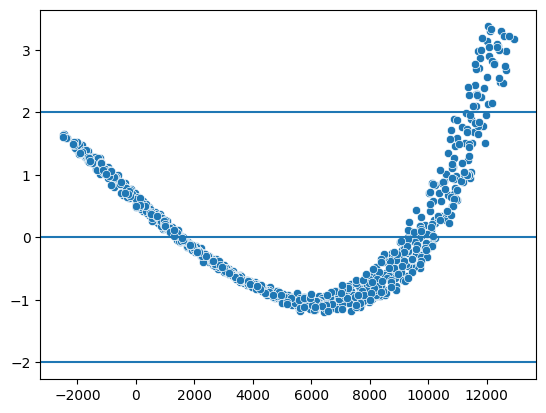

In [225]:
# Verify linearity of residuals
sns.scatterplot(x=y_pred_total, y=residuals_std)

plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

Text(0, 0.5, 'Standardized residuals')

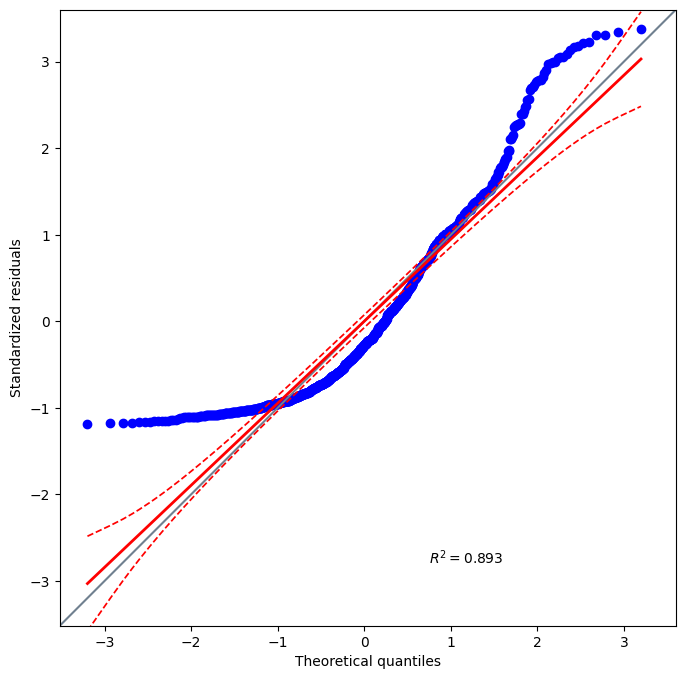

In [226]:
# Check residuals follow a normal distribution
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuals_std, dist='norm', confidence=.95)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Standardized residuals')

In [227]:
# Normality test - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

stat_shapiro, p_value_shapiro = shapiro(residuals)
print(f'Statistic Shapiro: {stat_shapiro}, p-value: {p_value_shapiro}')

Statistic Shapiro: 0.8919692179652284, p-value: 7.013497918014399e-26


In [228]:
# Normality test - Kolmogorov-Smirnov
stat_kstest, p_value_kstest = kstest(residuals, 'norm')
print(f'Statistic Kolmogorov-Smirnov: {stat_kstest}, p-value: {p_value_kstest}')

Statistic Kolmogorov-Smirnov: 0.5939999999999955, p-value: 0.0


In [229]:
# Normality test - Lilliefors
stat_lilliefors, p_value_lilliefors = lilliefors(residuals, dist='norm', pvalmethod='table')
print(f'Statistic Lilliefors: {stat_lilliefors}, p-value: {p_value_lilliefors}')

Statistic Lilliefors: 0.11825983774680088, p-value: 0.0009999999999998899


### Training Polynomial Regression

In [230]:
# Example of features creation for polynomial regression
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [231]:
# Block for model training

# polynomial_degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
polynomial_degrees = [4]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2_score_test_values = []

# Split using KFold with five folds
kf = KFold(n_splits=5, shuffle=True, random_state=51)

for degree in polynomial_degrees:
    # Create a pipeline
    # 1. Standardize the data (tempo_na_empresa and nivel_na_empresa)

    # Names of the columns to be standardized
    columns_to_standardize = ['tempo_na_empresa', 'nivel_na_empresa']

    # Transformer to numeric variables
    transformer_numeric = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Create column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numeric, columns_to_standardize)
        ]
    )
    
    # Create Polynomial Features
    feat_poly = PolynomialFeatures(degree=degree, include_bias=False)

    # Create a principal pipeline
    model_poly = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly_features', feat_poly),
        ('regressor', LinearRegression())
    ])

    # Storage RMSE
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Storage R2
    r2score_fold_test = []

    # Storage residuals
    residuals = []

    # Storage predictions
    y_pred_total = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the model
        model_poly.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)
        
        # Calculate RMSE
        rmse_train = np.sqrt(np.mean((y_train - y_train_pred)**2))
        rmse_test = np.sqrt(np.mean((y_test - y_test_pred)**2))
        r2_score_test = r2_score(y_test, y_test_pred)
        residuals_test = np.array(y_test - y_test_pred)
        
        # Append to storage
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2_score_test)
        residuals.append(residuals_test)
        y_pred_total.append(y_test_pred)

    # Print RMSE
    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)

    percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100 
    residuals = np.array(residuals).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)
    
    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2_score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)

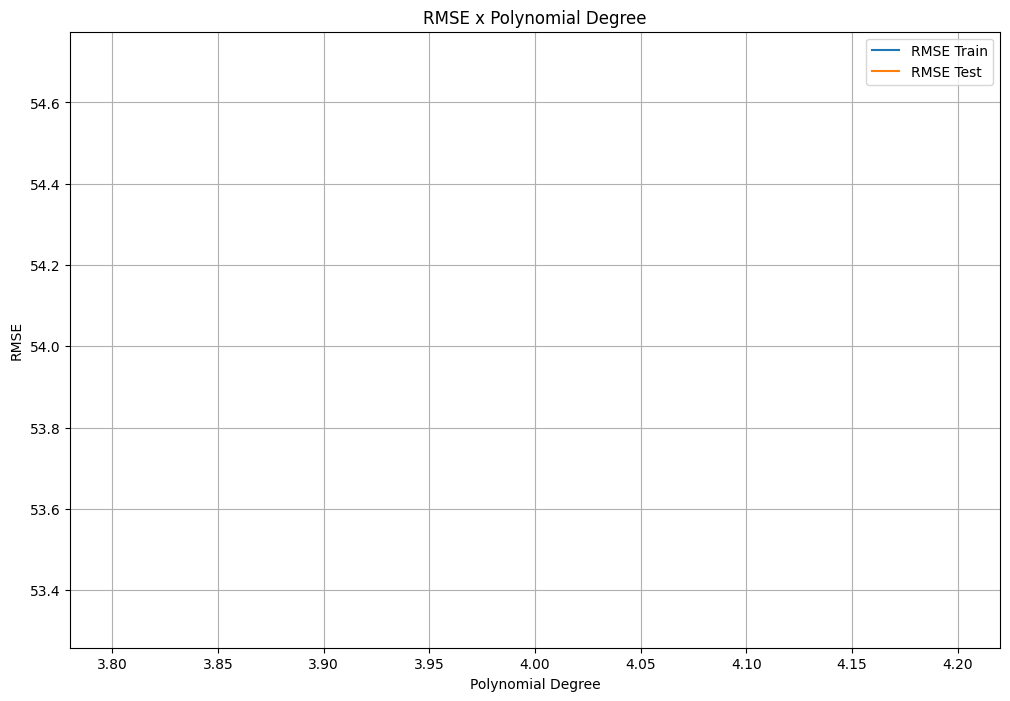

In [232]:
# Plot Graph to compare RMSE and polynomial degree
plt.figure(figsize=(12,8))
plt.plot(polynomial_degrees, rmse_train_values, label='RMSE Train')
plt.plot(polynomial_degrees, rmse_test_values, label='RMSE Test')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE x Polynomial Degree')
plt.legend()
plt.grid()

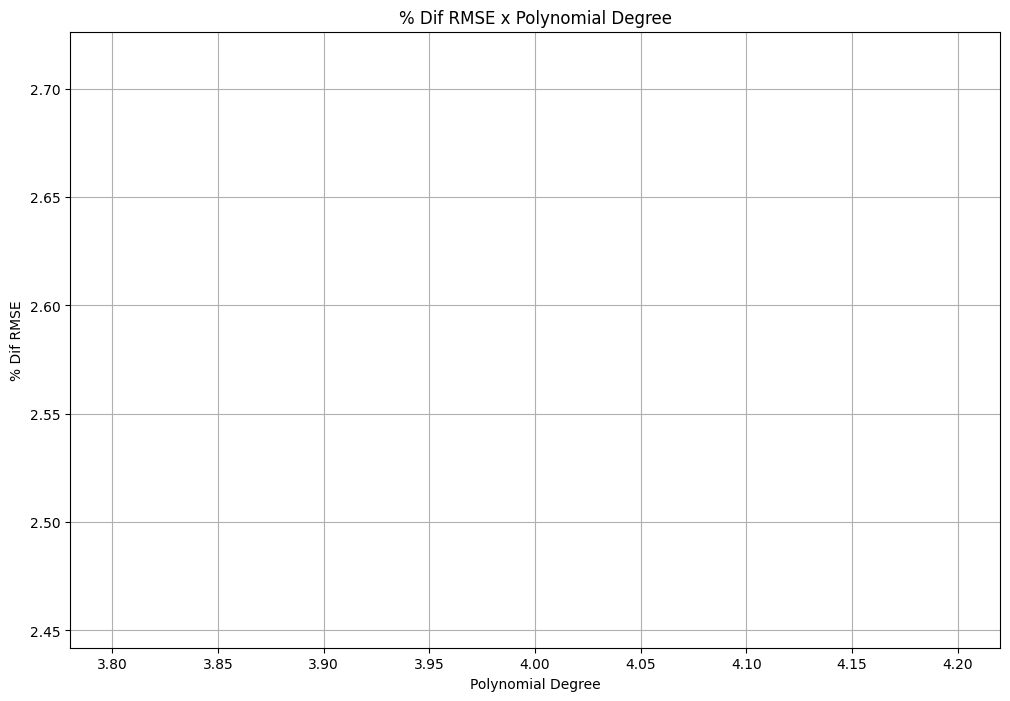

In [233]:
# Plot Graph to compare % RMSE (Train x Test) 
plt.figure(figsize=(12,8))
plt.plot(polynomial_degrees, percentual_rmse_values, label='% RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('% Dif RMSE')
plt.title('% Dif RMSE x Polynomial Degree')
plt.grid()

### Metrics Analysis - Polynomial Model

In [234]:
# Metrics
print(f'RMSE Train: {rmse_train_final}')
print(f'RMSE Test: {rmse_test_final}')
print(f'%: {percentual_rmse_final}')
print(f'R2 Score: {r2score_test_final}')

RMSE Train: 53.32698559565161
RMSE Test: 54.70504352796313
%: 2.584166190754818
R2 Score: 0.9998524123039415


### Residuals analysis - Linear Regression

In [235]:
# Transform residuals to standardize
# (X - mean) / std
from scipy.stats import zscore

residuals_std = zscore(residuals)

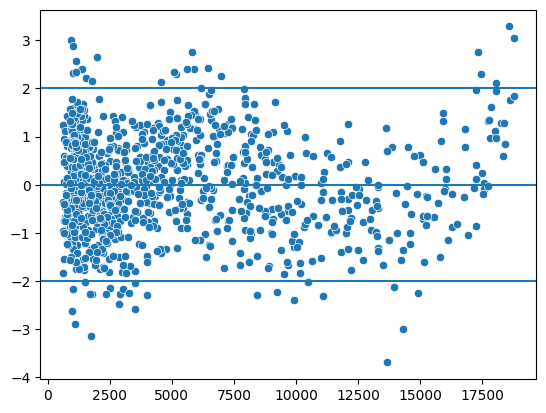

In [236]:
# Verify linearity of residuals
sns.scatterplot(x=y_pred_total, y=residuals_std)

plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

Text(0, 0.5, 'Standardized residuals')

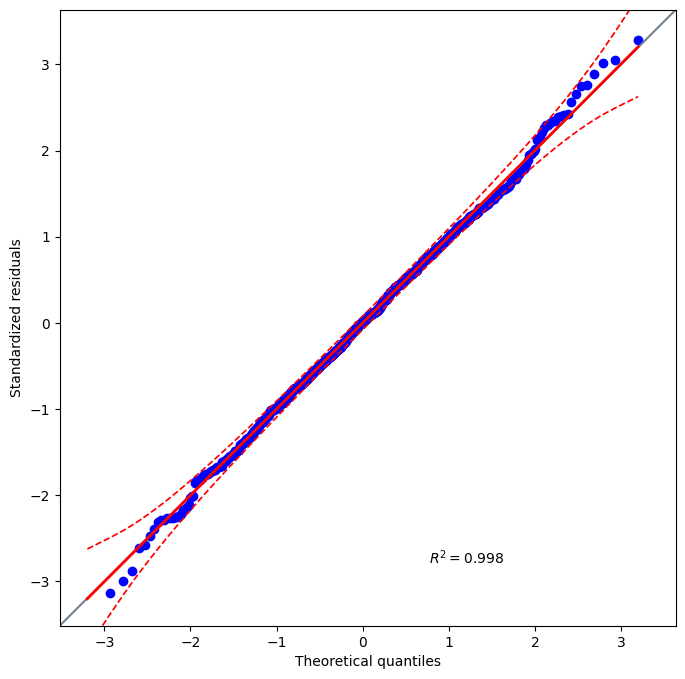

In [237]:
# Check residuals follow a normal distribution
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuals_std, dist='norm', confidence=.95)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Standardized residuals')

In [238]:
# Normality test - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

stat_shapiro, p_value_shapiro = shapiro(residuals)
print(f'Statistic Shapiro: {stat_shapiro}, p-value: {p_value_shapiro}')

Statistic Shapiro: 0.9986951372205334, p-value: 0.6852797159667363


In [239]:
# Normality test - Kolmogorov-Smirnov
stat_kstest, p_value_kstest = kstest(residuals, 'norm')
print(f'Statistic Kolmogorov-Smirnov: {stat_kstest}, p-value: {p_value_kstest}')

Statistic Kolmogorov-Smirnov: 0.4823744649953454, p-value: 1.2202460105545391e-214


In [240]:
# Normality test - Lilliefors
stat_lilliefors, p_value_lilliefors = lilliefors(residuals, dist='norm', pvalmethod='table')
print(f'Statistic Lilliefors: {stat_lilliefors}, p-value: {p_value_lilliefors}')

Statistic Lilliefors: 0.013637346894958324, p-value: 0.9566270022050855


### Perform individual predictions

In [249]:
input_features = {
    'tempo_na_empresa': 80,
    'nivel_na_empresa': 10
}

pred_df = pd.DataFrame(input_features, index=[1])

In [250]:
# Prediction
model_poly.predict(pred_df)

array([5977.64164035])

In [251]:
import joblib

In [252]:
# Save model
joblib.dump(model_poly, './salary_model.pkl')

['./salary_model.pkl']